<a href="https://colab.research.google.com/github/marcos-code/sigmoidal_datascience/blob/main/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Panorama do COVID-19 no Brasil

A COVID-19 é uma doença causada pelo coronavírus, denominado SARS-CoV-2, que apresenta um espectro clínico variando de infecções assintomáticas a quadros graves. De acordo com a Organização Mundial de Saúde, a maioria (cerca de 80%) dos pacientes com COVID-19 podem ser assintomáticos ou oligossintomáticos (poucos sintomas), e aproximadamente 20% dos casos detectados requer atendimento hospitalar por apresentarem dificuldade respiratória, dos quais aproximadamente 5% podem necessitar de suporte ventilatório.



![](https://www.arcbrokers.com/wp-content/uploads/2020/03/covid-19.jpg)

Os sintomas da COVID-19 podem variar de um resfriado, a uma Síndrome Gripal-SG (presença de um quadro respiratório agudo, caracterizado por, pelo menos dois dos seguintes sintomas: sensação febril ou febre associada a dor de garganta, dor de cabeça, tosse, coriza) até uma pneumonia severa. Sendo os sintomas mais comuns:

* Tosse
* Febre
* Coriza
* Dor de garganta
* Dificuldade para respirar
* Perda de olfato (anosmia)
* Alteração do paladar (ageusia)
* Distúrbios gastrintestinais (náuseas/vômitos/diarreia)
* Cansaço (astenia)
* Diminuição do apetite (hiporexia)
* Dispnéia ( falta de ar)

#Obtenção dos Dados

Os dados que serão analisados foram adquiridos pelo portal [Our World in Data](https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=2020-03-01..latest&country=USA~GBR~CAN~DEU~ITA~IND&region=World&pickerMetric=location&pickerSort=asc&Metric=Confirmed+cases&Interval=7-day+rolling+average&Align+outbreaks=false&Relative+to+Population=true)
 
 (escrever mais)
 

In [4]:
# importando os pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


#Dicionário do Dataset
column - Descrição

* iso_code - códigos de países de três letras - 3166-1 alfa-3 ISO

* continent - Continente da localização geográfica

* location - Localização geográfica

* date - Data de observação

* total_cases - Total de casos confirmados de COVID-19

* new_cases - Novos casos de COVID-19 confirmado

* new_cases_smoothed - Novos casos de COVID-19 (7-dia alisada) confirmou

* total_deaths - Total de mortes atribuídas a COVID-19

* new_deaths - Novas mortes atribuídas a COVID-19

* new_deaths_smoothed - Novas mortes atribuídas a COVID-19 (suavizado 7 dias)

* total_cases_per_million - Total de casos confirmados de COVID-19 por 
1.000.000 de pessoas

* new_cases_per_million - Nova casos confirmados de COVID-19 por 1.000.000 de pessoas

* new_cases_smoothed_per_million - Nova casos confirmados de COVID-19 (7 dias suavizado) por 1.000.000 de pessoas

* total_deaths_per_million - Total de mortes atribuídas a COVID-19 por 1.000.000 de pessoas

* new_deaths_per_million - Novas mortes atribuídas ao COVID-19 por 
1.000.000 de pessoas

* new_deaths_smoothed_per_million - Novas mortes atribuídas a COVID-19 (alisada de 7 dias) por 1.000.000 de pessoas

* reproduction_rate - estimativa em tempo real da taxa de reprodução efectiva (R) de COVID-19.

* icu_patients - Número de COVID-19 pacientes em unidades de cuidados intensivos (UTIs) num dado dia

* icu_patients_per_million - Número de COVID-19 pacientes em unidades de terapia intensiva (UTIs) em um determinado dia por 1.000.000 de pessoas

* hosp_patients - Número de COVID-19 pacientes no hospital em um determinado dia

* hosp_patients_per_million - Número de COVID-19 pacientes no hospital em um determinado dia por 1.000.000 de pessoas

* weekly_icu_admissions - Número de COVID-19 pacientes recém-admitidos em unidades de cuidados intensivos (UTIs) em uma dada semana

* weekly_icu_admissions_per_million - Número de COVID-19 pacientes recém-admitidos em unidades de terapia intensiva (UTIs) em uma determinada semana por 1.000.000 de pessoas

* weekly_hosp_admissions - Número de COVID-19 pacientes recém-admitidos em hospitais em uma semana

* weekly_hosp_admissions_per_million - Número de COVID-19 pacientes recém-admitidos em hospitais em uma determinada semana por 1.000.000 de pessoas

* total_tests - Total de Testes para COVID-19

* new_tests - Os novos ensaios para COVID-19 (somente calculada para dias consecutivos)

* total_tests_per_thousand - Total de Testes para COVID-19 por 1.000 pessoas

* new_tests_per_thousand - Novos testes para COVID-19 por 1.000 pessoas

* new_tests_smoothed - Os novos ensaios para COVID-19 (7-dia alisado). Para os países que não relatam testando os dados em uma base diária, assumimos que o teste mudou igualmente em uma base diária sobre quaisquer períodos em que há dados f

* new_tests_smoothed_per_thousand - Os novos ensaios para COVID-19 (7-dia suavizado) por 1.000 pessoas

* positive_rate - O partes de COVID-19 testes que são positivas, dadas como uma média móvel em 7 dias (este é o inverso da tests_per_case)

* tests_per_case - Testes realizados por novo caso confirmado de COVID-19, dadas como uma média móvel em 7 dias (este é o inverso da positive_rate)

* tests_units - Unidades usadas pela localização para relatar seus dados de testes

* total_vaccinations - Número total de COVID-19 vacinação doses administradas

* people_vaccinated - Número total de pessoas que receberam pelo menos uma dose da vacina

* people_fully_vaccinated - Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação

* new_vaccinations - Nova COVID-19 doses administradas de vacinação (somente calculados para dias consecutivos)

* new_vaccinations_smoothed - Novas doses COVID-19 administrado de vacinação (7 dias de suavizados). Para os países que não relatam dados de vacinação em uma base diária, assumimos que a vacinação alterou igualmente em uma base diária sobre

* total_vaccinations_per_hundred - Número total de COVID-19 vacinação doses administradas por 100 pessoas na população total

* people_vaccinated_per_hundred - Número total de pessoas que receberam pelo menos uma dose da vacina por cada 100 pessoas no total da população

* people_fully_vaccinated_per_hundred - Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação por 100 pessoas na população total

* new_vaccinations_smoothed_per_million - Nova COVID-19 doses administradas vacinação (7 dias de suavizados) por 1.000.000 de pessoas na população total

* stringency_index - Governo Response Índice Rigor: medida composta com base em 9 indicadores de resposta incluindo o fechamento de escolas, fechamento de locais de trabalho, e proibição de viajar, escalonados para um valor de 0 a 100 (100

* population - População em 2020

* population_density - Número de pessoas divididas por área de terra, medido em quilômetros quadrados, dos anos mais recentes disponíveis

* median_age - A idade média da população, a projeção das Nações Unidas para 2020

* aged_65_older - Percentagem da população que é de 65 anos e mais velhos, dos anos mais recentes disponíveis

* aged_70_older - Parcela da população que é de 70 anos ou mais em 2015

* gdp_per_capita - Produto interno bruto a paridade de poder aquisitivo (constantes de 2011 dólares internacionais), dos anos mais recentes disponíveis

* extreme_poverty - Parcela da população vivendo em extrema pobreza, dos anos mais recentes disponíveis desde 2010

* cardiovasc_death_rate - Taxa de mortalidade por doenças cardiovasculares em 2017 (número anual de mortes por 100.000 pessoas)

* diabetes_prevalence - prevalência diabetes (% da população com idades entre 20 a 79) em 2017

* female_smokers - Percentagem de mulheres que fumam, dos anos mais recentes disponíveis

* male_smokers - Parcela de homens que fumam, dos anos mais recentes disponíveis

* handwashing_facilities - Percentagem da população com instalações de lavagem das mãos básicas sobre instalações, dos anos mais recentes disponíveis

* hospital_beds_per_thousand - camas hospitalares por 1.000 pessoas, dos anos mais recentes disponíveis desde 2010

* life_expectancy - A expectativa de vida ao nascer em 2019

* human_development_index - Um índice composto que mede a realização média em três dimensões básicas do desenvolvimento: uma vida longa e saudável humano, conhecimento e um padrão de vida decente.

#Analise Exploratória dos dados
Antes de entrar a fundo nas análises dos dados, vamos entendê-los e ver como que estão distribuídos, e mais a frente entraremos na análise no Brasil e ver o que os dados nos contam!



In [5]:
#importando dataset Covid-19 para um Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')



Vamos utilizar algumas funções para exibir nosso conjunto de dados para análise.


In [6]:
#Fazendo um backup do nosso dataset
covid = df.copy()


In [7]:
# Visualizando as primeiras entrdas do nosso dataset
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [8]:
# Verificando as entrdas e as variáveis do nosso dataset


print('O Dataser possui {} entradas e {} variáveis'.format(covid.shape[0], covid.shape[1]))

O Dataser possui 78457 entradas e 59 variáveis


Vamos extrair o nome das colunas que nosso dataset possui







In [9]:
# Visualizando os nomes das coulunas
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [ ]:
# Verificando os tipos das váriaveis de cada colunas
covid.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

Outro ponto que devemos ter atenção em nosso dataset são os valores ausentes, iremos verificar a ausencia deles

In [29]:
# Verificando dados ausentes
round((covid.isnull().sum() / covid.shape[0]).sort_values(ascending=False),2)*100

weekly_icu_admissions                    99.0
weekly_icu_admissions_per_million        99.0
weekly_hosp_admissions                   98.0
weekly_hosp_admissions_per_million       98.0
people_fully_vaccinated                  95.0
people_fully_vaccinated_per_hundred      95.0
new_vaccinations                         94.0
people_vaccinated                        93.0
people_vaccinated_per_hundred            93.0
total_vaccinations                       92.0
total_vaccinations_per_hundred           92.0
icu_patients_per_million                 90.0
icu_patients                             90.0
new_vaccinations_smoothed_per_million    88.0
new_vaccinations_smoothed                88.0
hosp_patients                            88.0
hosp_patients_per_million                88.0
total_tests                              55.0
total_tests_per_thousand                 55.0
new_tests                                54.0
new_tests_per_thousand                   54.0
handwashing_facilities            

Vamos transformar a coluna data em datetime

In [ ]:
#Trnasformando a coluna data em datetime
covid['date'] = pd.to_datetime(covid.date)

Ao fazer a tranformação da coluna iremos ver qual a data mais recente do nosso dataset, com essa análise poderemos ver qual país está liderando i ranking em casos.

In [11]:
#Verificando as datas do dataset 
dmin = covid.date.min()
dmax = covid.date.max()
print("Vai do dia {} ao dia {}".format(dmin,dmax))

Vai do dia 2020-01-01 ao dia 2021-03-30


Podemos reparar que os dados vão desde de Janiero de 2020 até dia 29 de março. Vamos ver quais os países que possuem maior casos de ocorrencia.

In [16]:
# Verificando os países com a data mais recente em nosso Dataset
casos_total = covid.loc[covid.date == dmax ].sort_values(by ="total_cases", ascending=False)

# Queremos apenas os dados  dos países em nosso dataset
casos_total = casos_total.dropna(subset=['continent'])
casos_total

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
74803,USA,North America,United States,2021-03-30,30393701.0,61240.0,66875.571,550996.0,875.0,994.286,91823.136,185.014,202.039,1664.627,2.643,3.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147602345.0,96044046.0,53423486.0,1789510.0,2769331.0,44.13,28.72,15.97,8280.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
10450,BRA,South America,Brazil,2021-03-30,12658109.0,84494.0,75441.429,317646.0,3780.0,2710.000,59550.923,397.508,354.919,1494.387,17.783,12.749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18222559.0,14112509.0,4110050.0,140406.0,430480.0,8.57,6.64,1.93,2025.0,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
32619,IND,Asia,India,2021-03-30,12149335.0,53480.0,59325.286,162468.0,354.0,289.571,8803.838,38.754,42.989,117.730,0.257,0.210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,785864.0,242650025.0,175.833,0.569,1033827.0,0.749,NaN,NaN,samples tested,63054353.0,53989035.0,9065318.0,1940999.0,1744724.0,4.57,3.91,0.66,1264.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645
26059,FRA,Europe,France,2021-03-30,4646014.0,30719.0,38915.286,95495.0,381.0,347.286,68175.667,450.771,571.043,1401.295,5.591,5.096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.814769e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
58513,RUS,Europe,Russia,2021-03-30,4486078.0,8162.0,8783.286,96817.0,404.0,369.429,30740.361,55.929,60.187,663.428,2.768,2.531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11183108.0,6886259.0,6886259.0,58758.0,72600.0,7.66,4.72,4.72,497.0,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60204,WSM,Oceania,Samoa,2021-03-30,3.0,0.0,0.000,NaN,NaN,0.000,15.120,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.984100e+05,69.413,22.0,5.606,3.564,6021.557,NaN,348.977,9.21,16.7,38.1,NaN,NaN,73.32,0.715
46043,FSM,Oceania,Micronesia (country),2021-03-30,1.0,0.0,0.000,NaN,NaN,0.000,8.694,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.150210e+05,150.777,23.0,4.810,2.392,3299.464,16.0,454.343,12.02,NaN,NaN,NaN,NaN,67.88,0.620
24726,FRO,Europe,Faeroe Islands,2021-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Podemos ver que em relação as mortes no mês de Março de 2021 que está liderendo é:

* USA - 550.996
* BRASIL - 317.646
* INDIA - 162.468

In [17]:
# Total de mortes, nos lugares mais recentes
mortes_total = covid.loc[covid.date == dmax].sort_values(by='total_deaths', ascending=False)

# Países referente a mortes
mortes_total = mortes_total.dropna(subset=['continent'])
mortes_total[:5]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
74803,USA,North America,United States,2021-03-30,30393701.0,61240.0,66875.571,550996.0,875.0,994.286,91823.136,185.014,202.039,1664.627,2.643,3.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147602345.0,96044046.0,53423486.0,1789510.0,2769331.0,44.13,28.72,15.97,8280.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
10450,BRA,South America,Brazil,2021-03-30,12658109.0,84494.0,75441.429,317646.0,3780.0,2710.000,59550.923,397.508,354.919,1494.387,17.783,12.749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18222559.0,14112509.0,4110050.0,140406.0,430480.0,8.57,6.64,1.93,2025.0,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
45974,MEX,North America,Mexico,2021-03-30,2232910.0,5067.0,4267.000,202633.0,801.0,512.143,17318.408,39.300,33.095,1571.618,6.213,3.972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7404912.0,NaN,NaN,386463.0,211135.0,5.74,NaN,NaN,1638.0,NaN,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779
32619,IND,Asia,India,2021-03-30,12149335.0,53480.0,59325.286,162468.0,354.0,289.571,8803.838,38.754,42.989,117.730,0.257,0.210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,785864.0,242650025.0,175.833,0.569,1033827.0,0.749,NaN,NaN,samples tested,63054353.0,53989035.0,9065318.0,1940999.0,1744724.0,4.57,3.91,0.66,1264.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645
74369,GBR,Europe,United Kingdom,2021-03-30,4355867.0,4071.0,4978.286,126912.0,55.0,55.571,64164.434,59.968,73.333,1869.487,0.810,0.819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932


Vamos plotar alguns gráficos para uma melhor visualização dos dados


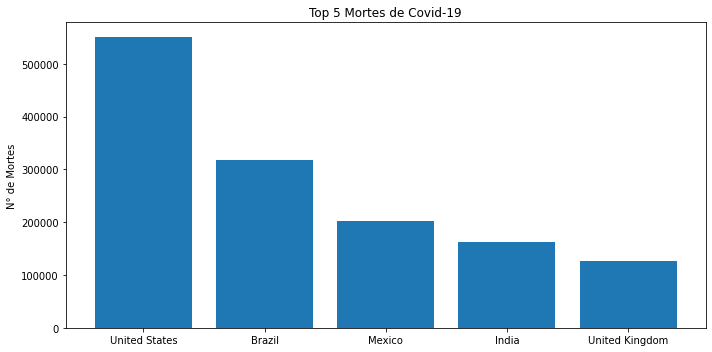

In [23]:
# Gráfico de barras para total de mortes 10 primeiros
top_5_total_mortes = mortes_total.head(5)

#plotando o total de mortes
fig, ax = plt.subplots(figsize=(10,5))
ax.bar('location', 'total_deaths', data=top_5_total_mortes)
ax.set_title('Top 5 Mortes de Covid-19')
ax.set_ylabel('N° de Mortes')
plt.tight_layout()

Plotando um gráfico de linha para demonstrar a evolução de mortes no mundo

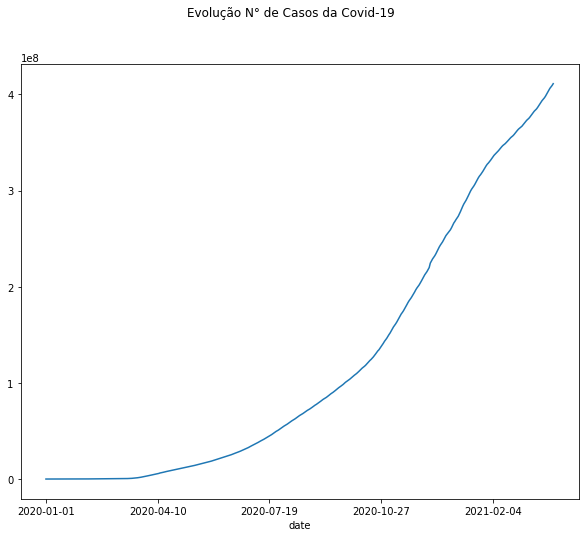

In [28]:
# grafico de linha para mortes no mundo
covid.loc[covid.location == "World", "total_deaths"].reset_index(drop=True)
covid.groupby(['date'])['total_cases'].sum().plot(figsize=(10,8))
plt.suptitle('Evolução N° de Casos da Covid-19')
plt.show()

**Análise Exploratótia da Vacina**
Com esta análise vamos ver quais países que mais vacinaram

Vamos criar um DataFrame, no qual vamos copiaremos as variáveis de nosso dataframe original, vamos analisar a variável `people_fully_vaccinated` e 
`people_fully_vaccinated_per_hundred`, percebemos que essas variáveis mostram a quantidade de pessoas que receberão todas as doses da vacina.

In [30]:
# Vamos criar um dataframe da vacina
vaci = covid[['continent', 'location', 'date',
                 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
                'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
                'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million',
                 'life_expectancy', 'human_development_index', 'aged_65_older',
                 'aged_70_older', 'stringency_index', 'population_density', 'median_age']].copy()

In [31]:
vaci.head()

,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,life_expectancy,human_development_index,aged_65_older,aged_70_older,stringency_index,population_density,median_age
0,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.83,0.511,2.581,1.337,8.33,54.422,18.6
1,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.83,0.511,2.581,1.337,8.33,54.422,18.6
2,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.83,0.511,2.581,1.337,8.33,54.422,18.6
3,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.83,0.511,2.581,1.337,8.33,54.422,18.6
4,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.83,0.511,2.581,1.337,8.33,54.422,18.6


In [33]:
# Vamos ver o tamanho do dataframe
print('O nosso dataframe possui {} entradas e {} variáveis'. format(vaci.shape[0], vaci.shape[1]))

O nosso dataframe possui 78457 entradas e 19 variáveis


In [34]:
# Vamos verificar quantos valores ausentes em nosso Dataset
round((vaci.isnull().sum() / vaci.shape[0]).sort_values(ascending=False),2)

people_fully_vaccinated_per_hundred      0.95
people_fully_vaccinated                  0.95
new_vaccinations                         0.94
people_vaccinated_per_hundred            0.93
people_vaccinated                        0.93
total_vaccinations                       0.92
total_vaccinations_per_hundred           0.92
new_vaccinations_smoothed_per_million    0.88
new_vaccinations_smoothed                0.88
stringency_index                         0.14
aged_65_older                            0.11
aged_70_older                            0.10
median_age                               0.10
human_development_index                  0.09
population_density                       0.07
life_expectancy                          0.05
continent                                0.05
date                                     0.00
location                                 0.00
dtype: float64

In [35]:
# Limpando os valores ausentes á primeira vacina
vaci.dropna(subset=['total_vaccinations'], axis=0, inplace=True)

In [36]:
round((vaci.isnull().sum() / vaci.shape[0]).sort_values(ascending=False),2)

people_fully_vaccinated_per_hundred      0.38
people_fully_vaccinated                  0.38
stringency_index                         0.22
aged_70_older                            0.16
human_development_index                  0.16
aged_65_older                            0.16
median_age                               0.15
new_vaccinations                         0.15
continent                                0.12
population_density                       0.11
people_vaccinated                        0.11
people_vaccinated_per_hundred            0.11
life_expectancy                          0.11
new_vaccinations_smoothed                0.03
new_vaccinations_smoothed_per_million    0.03
total_vaccinations_per_hundred           0.00
total_vaccinations                       0.00
date                                     0.00
location                                 0.00
dtype: float64

In [37]:
# Vamos entender nossa distribuição estatística com o método describe
vaci.describe()


,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,life_expectancy,human_development_index,aged_65_older,aged_70_older,stringency_index,population_density,median_age
count,5.892000e+03,5.247000e+03,3.640000e+03,5.004000e+03,5.727000e+03,5892.000000,5247.000000,3640.000000,5727.000000,5254.000000,4974.000000,4978.000000,4932.000000,4590.000000,5229.000000,4987.000000
mean,9.200107e+06,6.323409e+06,3.098551e+06,3.329872e+05,2.760375e+05,9.248968,6.468830,3.687080,2636.040684,78.139931,0.837007,13.384061,8.710964,66.246728,467.969187,37.176118
std,3.739632e+07,2.320327e+07,1.061699e+07,1.249394e+06,1.019554e+06,17.837812,11.327893,8.135974,4867.689802,4.758631,0.099900,6.351598,4.488033,14.005538,1968.805760,7.182319
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,54.690000,0.452000,1.144000,0.526000,12.040000,0.137000,16.400000
25%,4.760150e+04,4.189000e+04,2.422275e+04,3.185000e+03,2.888500e+03,0.620000,0.550000,0.317500,443.000000,75.930000,0.779000,7.646000,4.718000,56.480000,45.135000,30.900000
50%,3.607980e+05,3.135740e+05,2.089225e+05,1.793650e+04,1.507200e+04,3.295000,2.720000,1.415000,1385.000000,78.740000,0.860000,14.952000,9.473000,69.440000,104.914000,39.700000
75%,2.541835e+06,2.118412e+06,1.246426e+06,1.156400e+05,9.547900e+04,10.100000,7.430000,3.420000,2773.500000,82.050000,0.919000,19.062000,12.849000,76.850000,214.243000,43.000000
max,5.779234e+08,3.271583e+08,1.293692e+08,2.015213e+07,1.498952e+07,175.270000,92.300000,82.970000,118759.000000,86.750000,0.957000,27.049000,18.493000,92.590000,20546.766000,48.200000


Percebemos que temos alguns valores outliers, pois são bem maiores do que os numeros de nosso dataset.

Vamos ver se existe alguma correlação significativa entre os dados apresentados.

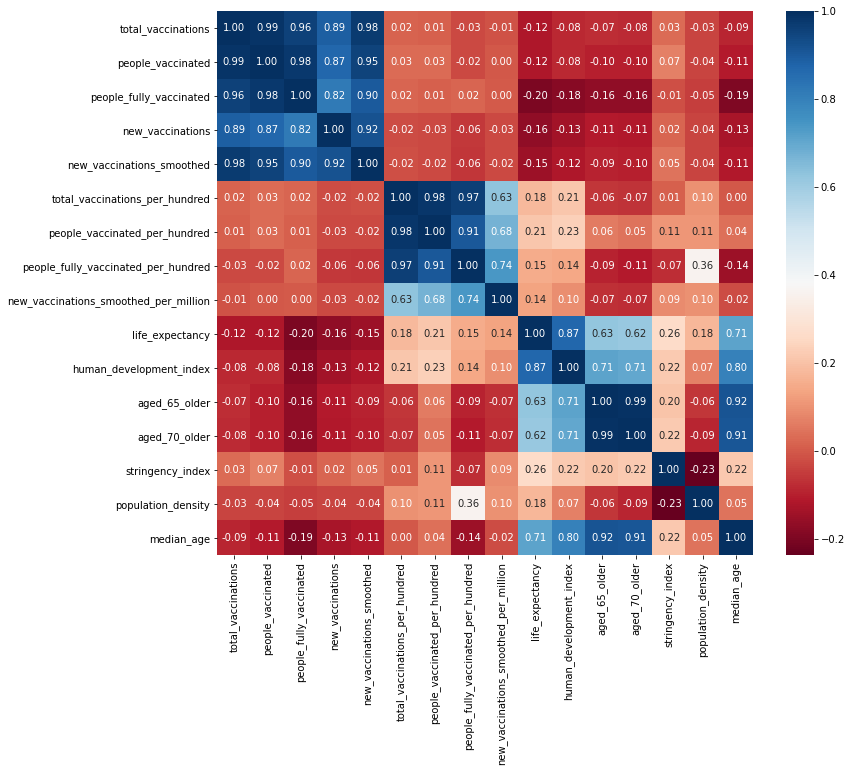

In [50]:
corr_vac = vaci.corr()
corr_vac
plt.subplots(figsize=(12,10));
sns.heatmap(corr_vac, cmap='RdBu', fmt='.2f', annot=True, linecolor='white');

Podemos analisar que as variáveis `total_vaccinations`, tem uma correlação forte com `new_vaccinations`

Vamos observar os dados relevantes sobre a vacinaçao:
* Países com mais vacinados por centena de pessoas
* Países com mais pessoas vacinadas, por centenas de pessoas
* Quais desses papises vacinaram mais pessoas, por centenas de pessoas

In [51]:
# Vamos definir o dia mais recente do Dataset
vac_hoje = vaci.loc[vaci.date == dmax]

#DEixando apenas os dados referentes á países no Dataset
vac_hoje = vac_hoje.dropna(subset=['continent'])

Países com mais doses vacinas aplicadas por centenas de pessoas.


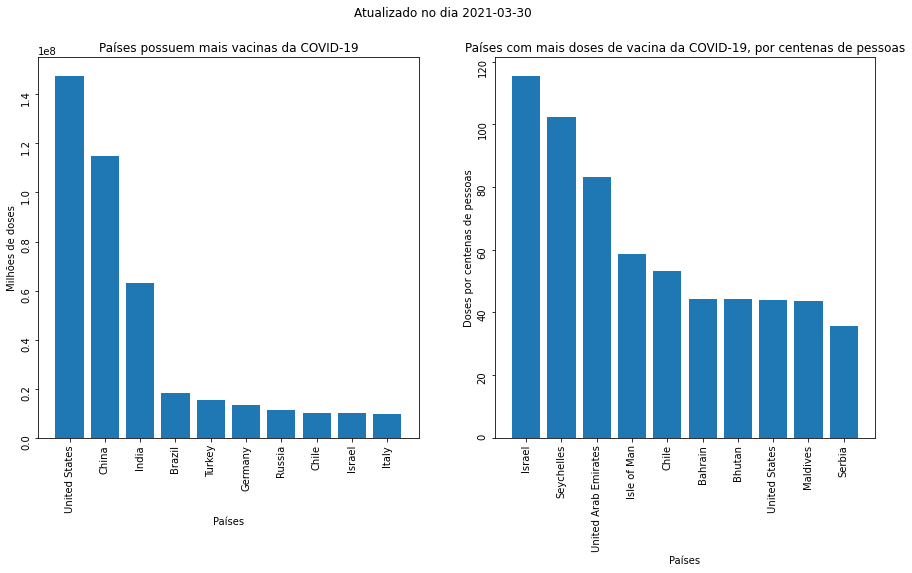

In [60]:
# organizando as variáveis
total_vacs = vac_hoje.sort_values(by='total_vaccinations', ascending=False)
total_vacs_ph = vac_hoje.sort_values(by='total_vaccinations_per_hundred', ascending=False)

# Vamos plotar os países que vacinaram mais
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
plt.suptitle('Atualizado no dia {}'.format(covid.date.max()))

ax1.bar('location', 'total_vaccinations', data=total_vacs.head(10))
ax1.set_title('Países possuem mais vacinas da COVID-19')
ax1.set_ylabel('Milhões de doses')
ax1.set_xlabel('Países')
ax1.tick_params(labelrotation=90)

ax2.bar('location', 'total_vaccinations_per_hundred', data=total_vacs_ph.head(10))
ax2.set_title('Países com mais doses de vacina da COVID-19, por centenas de pessoas'.format(covid.date.max()), fontsize= 12)
ax2.set_ylabel('Doses por centenas de pessoas')
ax2.set_xlabel('Países')
ax2.tick_params(labelrotation=90)

Podemos observar que Israel possui um número com mais pessoas vacinadas 

**Países que mais vacinaram por completo, por centena de pessoas.**


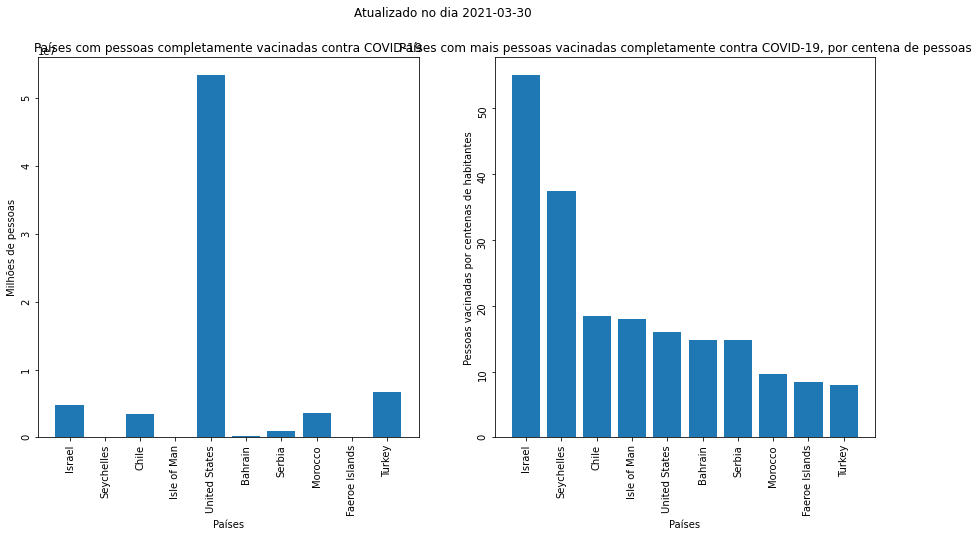

In [67]:
vacs_total = vac_hoje.sort_values(by='people_fully_vaccinated', ascending=False)
vacs_total = vac_hoje.sort_values(by='people_fully_vaccinated_per_hundred', ascending=False)

#Plotando os países com mais pessoas vacinadas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
plt.suptitle('Atualizado no dia {}'. format(covid.date.max()))

ax1.bar('location', 'people_fully_vaccinated', data=vacs_total.head(10))
ax1.set_title('Países com pessoas completamente vacinadas contra COVID-19')
ax1.set_ylabel('Milhões de pessoas')
ax1.set_xlabel('Países')
ax1.tick_params(labelrotation=90)

ax2.bar('location', 'people_fully_vaccinated_per_hundred', data=vacs_total.head(10))
ax2.set_title('Países com mais pessoas vacinadas completamente contra COVID-19, por centena de pessoas'.format(covid.date.max()))
ax2.set_ylabel('Pessoas vacinadas por centenas de habitantes')
ax2.set_xlabel('Países')
ax2.tick_params(labelrotation=90)

Aqui indicamos o numero de pessoas completamente vacinadas, aquelas que tomaram todas as doses da vacina, Israel novamente vem liderando esse ranking.

#Analise Exploratória para o Brasil

Vamos observar agora os dados sobre a vacinação no Brasil, país no qual é do nosso extremo interesse nas exploração dos dados.

In [98]:
# Criando uma cópia com os dados de vacina para o Brasil
vac_brasil = covid.loc[covid.location == "Brazil"].copy()

vac_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10052,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10053,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10054,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10055,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10056,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


**Data do primeiro registro no Brasil foi em 26 de fevereiro de 2020**

In [97]:
vac_brasil.loc[vac_brasil['new_cases'] != 0].head(1) 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10052,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


**Primeira morte no Brasil**